In [ ]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import scipy.optimize as opt

In [ ]:
df = pd.read_csv ('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')
df.head ()

,Exam 1 marks,Exam 2 marks,Admission status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
df.columns = ['exam_1', 'exam_2', 'status']
m, n = df.shape 
m, n

(100, 3)

In [ ]:
df_admitted = df[df['status'] == 1]
df_admitted.shape

(60, 3)

In [ ]:
df_notadmitted = df[df['status'] == 0]
df_notadmitted.shape

(40, 3)

In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   exam_1  100 non-null    float64
 1   exam_2  100 non-null    float64
 2   status  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


*Visualise data*

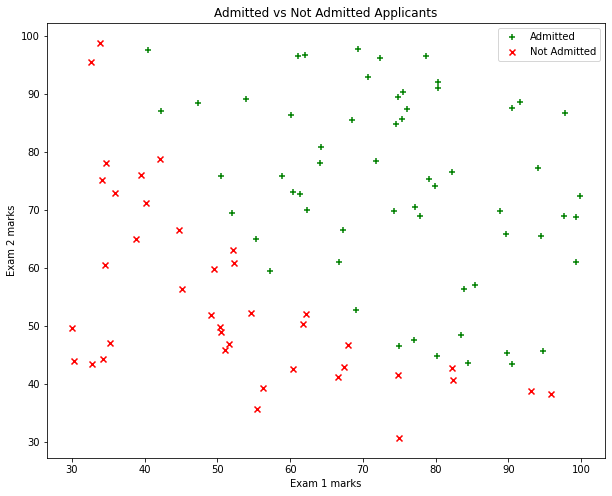

In [ ]:
plt.figure (figsize = (10, 8))
plt.scatter (df_admitted ['exam_1'], df_admitted ['exam_2'], c = 'g', marker = '+', label = 'Admitted')
plt.scatter (df_notadmitted ['exam_1'], df_notadmitted ['exam_2'], c = 'r', marker = 'x', label = 'Not Admitted')
plt.xlabel ('Exam 1 marks')
plt.ylabel ('Exam 2 marks')
plt.legend ()
plt.title ('Admitted vs Not Admitted Applicants')
warnings.filterwarnings ('ignore')

In [ ]:
# Input X values from Pandas dataframe
X = df.iloc [:, 0:2]
# Add bias column '1 into X
X = np.hstack ((np.ones ((m, 1)), X))
y = df.iloc [:, -1]

*Linear Hypothesis*

In [ ]:
# Input functions
def sigmoid (z):
    # Sigmoid function
    g = 1/ (1 + np.exp(-z))
    return g

def cost_function (theta, X, y):
    # Cost function J
    m, n = X.shape  
    x_dot_theta = X.dot (theta)
    J = 1.0 / m * np.dot((y.T - x_dot_theta.T),(y.T - x_dot_theta.T).T)
    return J

def gradient_function (theta, X, y):
    # Compute gradient descent
    m, n = X.shape
    x_dot_theta = X.dot (theta)
    grad = (np.dot(X.T, (x_dot_theta - y))) / (2*m)
    return grad



In [ ]:
theta = np.zeros (n)
cost = cost_function (theta, X, y)
grad = gradient_function (theta, X, y)
print ('Cost at initial theta: Cost =', cost)
print ('Gradient descent at initial theta: Gradient =', grad)

    

Cost at initial theta: Cost = 0.6
Gradient descent at initial theta: Gradient = [ -0.3        -22.41567681 -22.18692062]


In [ ]:
# Implement Advanced Optimisation to compute optimal theta
theta, nfeval, rc = opt.fmin_tnc(func = cost_function, fprime = gradient_function, x0 = theta, args = (X, y))

cost = cost_function (theta, X, y)
print ('Cost at theta found by fminunc: Cost =', cost)
print ('theta =', theta)

Cost at theta found by fminunc: Cost = 0.09449393124689869
theta = [-1.29749682  0.01484087  0.01394217]


*Visualise data with Linear hypothesis*

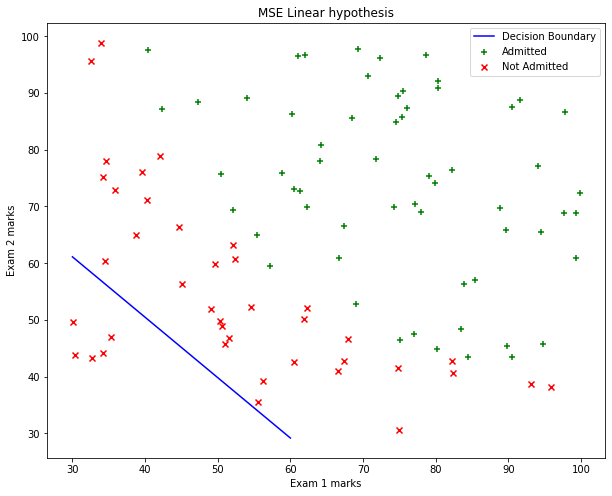

In [ ]:
# PLot data
plt.figure (figsize = (10, 8))
plt.scatter (df_admitted ['exam_1'], df_admitted ['exam_2'], c = 'g', marker = '+', label = 'Admitted')
plt.scatter (df_notadmitted ['exam_1'], df_notadmitted ['exam_2'], c = 'r', marker = 'x', label = 'Not Admitted')
plt.xlabel ('Exam 1 marks')
plt.ylabel ('Exam 2 marks')

#Plot hypothesis
x_values = [30, 60]
y_values = -(theta[0] + np.dot(theta[1], x_values))/ theta[2]

plt.plot (x_values, y_values, c = 'b', label = 'Decision Boundary')
plt.legend ()
plt.title ('MSE Linear hypothesis')
warnings.filterwarnings ('ignore')


In [ ]:
def predict (theta, X):
    p = sigmoid (X.dot(theta)) >= 0.5
    return p.astype (int)

p = predict (theta, X)
print ('Accuracy:', np.mean (p == y)* 100, '%')

Accuracy: 65.0 %


*Non-linear hypothesis*

In [ ]:
df_mapping = df
df_mapping ['exam_1'] = round (df_mapping['exam_1'], 2)
df_mapping ['exam_2'] = round (df_mapping['exam_2'], 2)
df_mapping ['exam_1**2'] = round (df_mapping['exam_1']**2, 2)
df_mapping ['exam_2**2'] = round (df_mapping['exam_2']**2, 2)
df_mapping ['exam_1**exam_2'] = round (df_mapping['exam_1']*df_mapping['exam_2'], 2)
df_mapping = df_mapping [['exam_1', 'exam_2', 'exam_1**2', 'exam_2**2', 'exam_1**exam_2', 'status']]

df_mapping.head ()

,exam_1,exam_2,exam_1**2,exam_2**2,exam_1**exam_2,status
0,34.62,78.02,1198.54,6087.12,2701.05,0
1,30.29,43.89,917.48,1926.33,1329.43,0
2,35.85,72.90,1285.22,5314.41,2613.46,0
3,60.18,86.31,3621.63,7449.42,5194.14,1
4,79.03,75.34,6245.74,5676.12,5954.12,1


In [ ]:
m, n = df.shape
print ('Number of training examples: m =', m)
print ('Number of features: n =', n - 1)

Number of training examples: m = 100
Number of features: n = 5


In [ ]:
# Compute cost function
X = df_mapping.iloc [:, 0:5]
# Add bias '1' into X
X = np.hstack((np.ones((m, 1)), X))
print ('Dimension of features matrix X =', X.shape, '\n')

y = df_mapping.iloc[:, -1]
for i in range (5):
  print ('x =', X[i, ], ',y =', y[i])

Dimension of features matrix X = (100, 6) 

x = [1.00000e+00 3.46200e+01 7.80200e+01 1.19854e+03 6.08712e+03 2.70105e+03] ,y = 0
x = [1.00000e+00 3.02900e+01 4.38900e+01 9.17480e+02 1.92633e+03 1.32943e+03] ,y = 0
x = [1.00000e+00 3.58500e+01 7.29000e+01 1.28522e+03 5.31441e+03 2.61346e+03] ,y = 0
x = [1.00000e+00 6.01800e+01 8.63100e+01 3.62163e+03 7.44942e+03 5.19414e+03] ,y = 1
x = [1.00000e+00 7.90300e+01 7.53400e+01 6.24574e+03 5.67612e+03 5.95412e+03] ,y = 1


In [ ]:
theta = np.zeros (n)
theta

array([0., 0., 0., 0., 0., 0.])

In [ ]:
cost = cost_function (theta, X, y)
print ('Cost at initial theta(zeros):', cost)
grad = gradient_function (theta, X, y)
print ("Gradient at inital theta(zeros):", grad)

Cost at initial theta(zeros): 0.6
Gradient at inital theta(zeros): [-3.00000000e-01 -2.24157000e+01 -2.21868500e+01 -1.74047865e+03
 -1.71649980e+03 -1.63401560e+03]


In [ ]:
theta, nfeval, rc = opt.fmin_tnc(func = cost_function, fprime = gradient_function, x0 = theta, args = (X, y))

cost = cost_function (theta, X, y)
print ('Cost at theta found by fminunc:', cost)
print ('theta:', theta)

Cost at theta found by fminunc: 0.08097562824178688
theta: [-3.37218832e+00  4.59528598e-02  5.15112347e-02 -2.29804020e-04
 -2.73544067e-04 -1.98144510e-05]


In [ ]:
def quadratic (a, b, c):
    # Just return x > 0
    delta = b**2 - 4*a*c
    if (delta >= 0):
        x1 = ((-b + math.sqrt(delta)) / (2*a))
        x2 = ((-b - math.sqrt(delta)) / (2*a))
    if (x1 > 0):
        return (x1)
    elif (x2 > 0):
        return (x2)

In [ ]:
x_values = np.concatenate ((np.linspace (30, 98, 69),[max(X[:,1])]))
x_values

array([30.  , 31.  , 32.  , 33.  , 34.  , 35.  , 36.  , 37.  , 38.  ,
       39.  , 40.  , 41.  , 42.  , 43.  , 44.  , 45.  , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 56.  ,
       57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  , 65.  ,
       66.  , 67.  , 68.  , 69.  , 70.  , 71.  , 72.  , 73.  , 74.  ,
       75.  , 76.  , 77.  , 78.  , 79.  , 80.  , 81.  , 82.  , 83.  ,
       84.  , 85.  , 86.  , 87.  , 88.  , 89.  , 90.  , 91.  , 92.  ,
       93.  , 94.  , 95.  , 96.  , 97.  , 98.  , 99.83])

In [ ]:
y_values = []
for x_value in x_values:
    a = theta[4]
    b = np.dot (theta[5], x_value) + theta[2]
    c = theta[0] + np.dot(theta[1], x_value) + np.dot(theta[3], x_value**2)
    y_value = quadratic (a, b, c)
    y_values.append (y_value)
y_values = np.asarray (y_values)
y_values

array([68.21613151, 66.05741075, 64.08292423, 62.25775941, 60.55714726,
       58.96275074, 57.46053778, 56.03948255, 54.69073168, 53.40704667,
       52.18241823, 51.01179188, 49.89086773, 48.81595149, 47.78384136,
       46.79174081, 45.83719045, 44.91801392, 44.0322746 , 43.17824048,
       42.3543555 , 41.5592158 , 40.79155009, 40.05020311, 39.33412171,
       38.64234306, 37.97398454, 37.32823511, 36.70434784, 36.10163343,
       35.51945458, 34.95722109, 34.41438553, 33.89043943, 33.38490996,
       32.89735691, 32.42737008, 31.97456692, 31.53859043, 31.11910724,
       30.715806  , 30.32839577, 29.95660473, 29.6001789 , 29.25888104,
       28.93248963, 28.620798  , 28.32361343, 28.04075648, 27.77206026,
       27.51736981, 27.2765416 , 27.04944293, 26.83595158, 26.63595529,
       26.44935148, 26.27604684, 26.1159571 , 25.96900669, 25.83512856,
       25.71426397, 25.60636225, 25.51138074, 25.42928458, 25.36004665,
       25.30364748, 25.26007518, 25.22932542, 25.21140144, 25.21

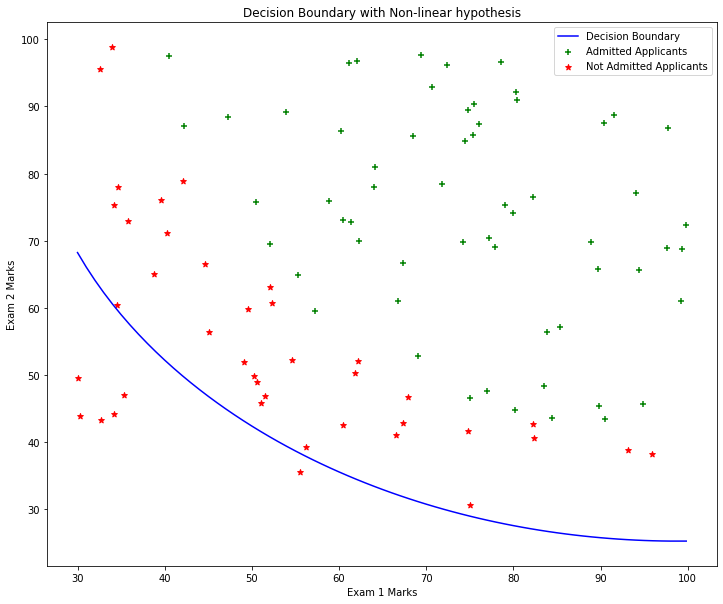

In [ ]:
plt.figure(figsize = (12,10))
plt.scatter (df_admitted['exam_1'], df_admitted['exam_2'], color='green', marker = '+', label='Admitted Applicants')
plt.scatter (df_notadmitted['exam_1'], df_notadmitted['exam_2'], color='red', marker = '*', label='Not Admitted Applicants')
plt.xlabel('Exam 1 Marks')
plt.ylabel('Exam 2 Marks')


plt.plot (x_values, y_values, color='blue', label='Decision Boundary')
plt.legend()
plt.title ('Decision Boundary with Non-linear hypothesis')
warnings.filterwarnings ('ignore')

In [ ]:
p = predict (theta, X)
print ('Accuracy:', np.mean (p == y)* 100, '%')

Accuracy: 66.0 %
